In [1]:
# OCR - pre processing techiniques
import pytesseract
from pytesseract import Output

ModuleNotFoundError: No module named 'pytesseract'

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image, ImageOps
import re

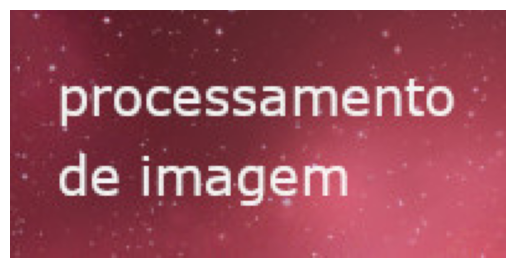

In [3]:
# 전처리기술1 : 흑백처리
img = Image.open('./content/img-process.jpg')
img_cv = np.array(img)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
img_cv.shape

(100, 200, 3)

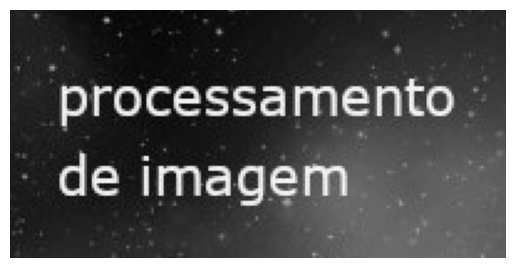

In [5]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
# 흑백처리 했더니 이미지 크기가 줄었다 (분석 시간이 줄고 메모리 사용량이 줄어듬)
gray.shape

(100, 200)

In [7]:
# 전처리기술2 : Thresholding (Binarization) 이진화
# Simple Thresholding
# Otsu method
# Adaptive Thresholding
# Gaussian Adaptive Thresholding
# Median Adaptive Thresholding
# Bilateral Filtering

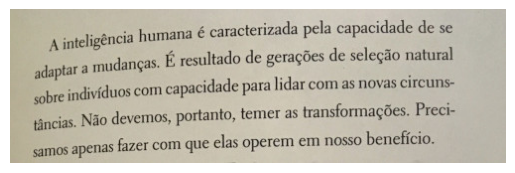

In [8]:
# Simple Thresholding
img = Image.open('./content/page-book.jpg')
img_cv = np.array(img)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()

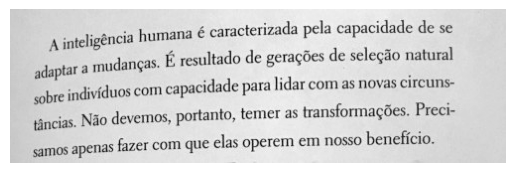

In [9]:
# 흑백처리
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

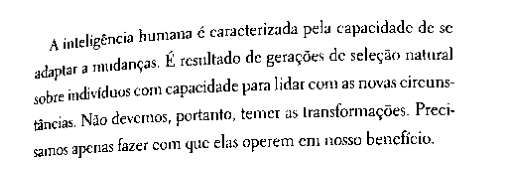

In [10]:
# 간단한 이진화
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)        # 127 이하면 0 (검정) 으로 만든다, 180보다 크면 255(흰색) 으로 만든다

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
value

127.0

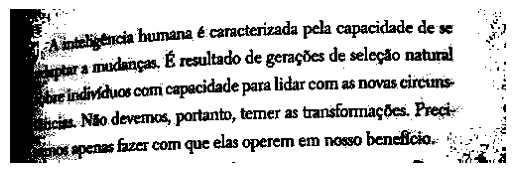

In [12]:
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)        # 180 이하면 0 (검정) 으로 만든다, 180보다 크면 255(흰색) 으로 만든다

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

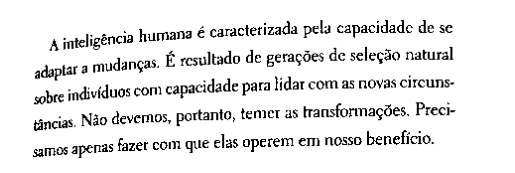

In [13]:
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)        # 140 이하면 0 (검정) 으로 만든다, 180보다 크면 255(흰색) 으로 만든다

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

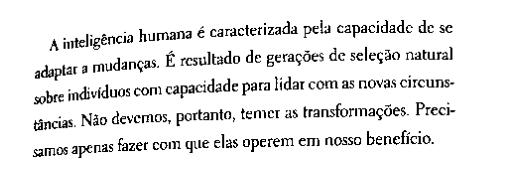

138.0


In [ ]:
# Otsu method (최적값 탐색)
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.axis('off')
plt.show()

print(value)            # Otsu 에서 결정한 최적값

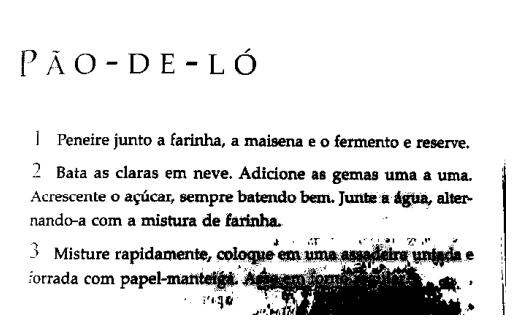

In [ ]:
img = Image.open('./content/recipe01.jpg')
img = ImageOps.exif_transpose(img)          # 회전 보정
img_cv = np.array(img)
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

value, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)        # 138 이하면 0 (검정) 으로 만든다, 138보다 크면 255(흰색) 으로 만든다

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()


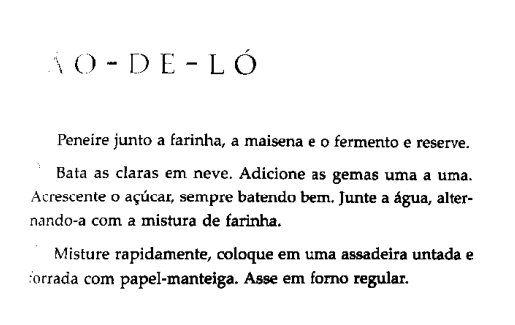

119.0


In [22]:
# Otsu method 사용
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.axis('off')
plt.show()

print(value)            # 자동 찾기

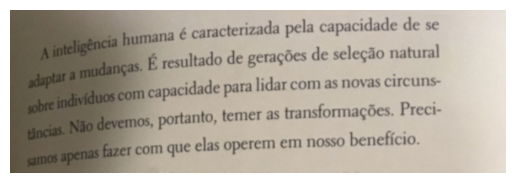

In [ ]:
# 어두운 부분 / 밝은 부분 Adaptive Thresholding 으로 전처리하여 보정
img = Image.open('./content/book02.jpg')
img_cv = np.array(img)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()


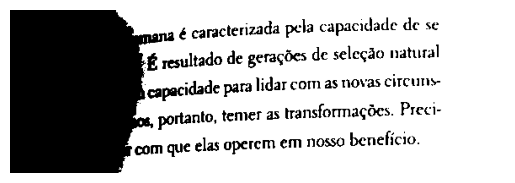

147.0


In [ ]:
# otsu 사용
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')
plt.axis('off')
plt.show()

print(value)

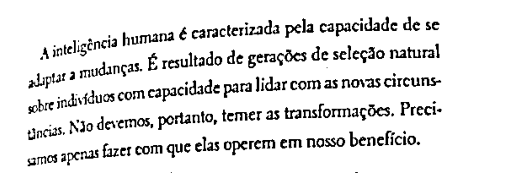

In [ ]:
# adaptive thresholding 사용
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)

plt.imshow(adaptive_average, cmap='gray')
plt.axis('off')
plt.show()

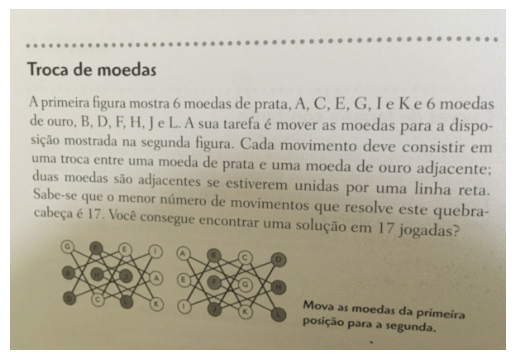

In [3]:
# Gaussian Adaptive Thresholding
img = Image.open('./content/book_adaptative.jpg')
img_cv = np.array(img)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()


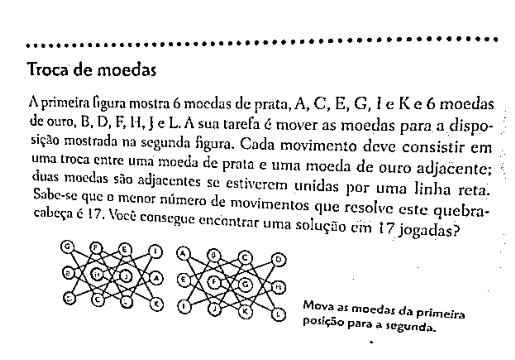

In [4]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)

plt.imshow(adaptive_gaussian, cmap='gray')
plt.axis('off')
plt.show()

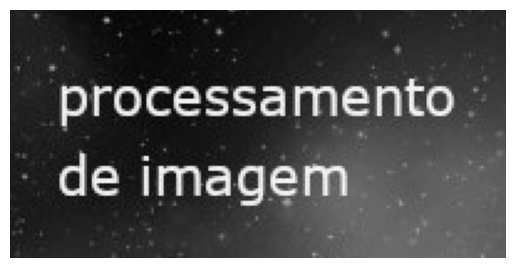

In [55]:
# COLOR INVERSION
img = Image.open('./content/img-process.jpg')
img_cv = np.array(img)
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


[[187 185 183 ... 179 181 181]
 [187 185 182 ... 180 181 178]
 [185 185 183 ... 181 182 179]
 ...
 [188 186 173 ... 132 132 131]
 [185 179 163 ... 131 131 130]
 [185 185 175 ... 132 133 132]]


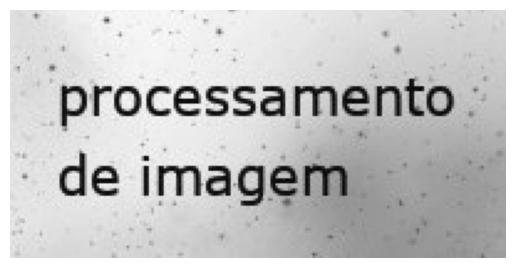

In [56]:
# 색상을 반전시킨다 (글씨를 검정으로)
invert = 255 - gray
print(invert)

plt.imshow(invert, cmap='gray')
plt.axis('off')
plt.show()

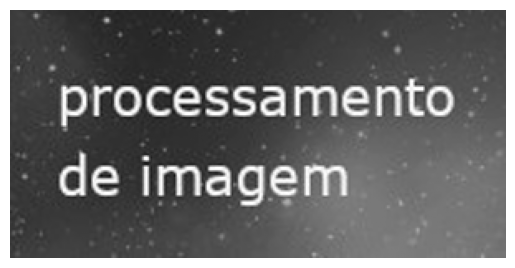

In [8]:
# RESIZE 크기변경
# INTER_NEAREST - 최근접 이웃 보간법. 가장 빠르기 때문에 널리 사용됩니다.
# INTER_LINEAR - 양선형 보간법(bilinear interpolation). 기본적으로 사용되는 방식이며, 일반적으로 이미지를 확대하거나 축소할 때 적합합니다.
# INTER_AREA - 픽셀 영역 비율을 사용하는 보간법. 이미지 축소 시 좋은 결과를 제공하므로 선호되는 방식일 수 있습니다.
# INTER_CUBIC - 4x4 이웃 픽셀을 사용하는 3차 보간법(bicubic interpolation). 더 나은 품질의 결과를 제공합니다.
# INTER_LANCZOS4 - 8x8 이웃 픽셀을 사용하는 Lanczos 보간법. 이 알고리즘들 중에서 가장 우수한 화질을 제공합니다.


increase = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

plt.imshow(increase, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
decrease = cv2.resize(gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

In [12]:
print(gray.shape)
print(increase.shape)
print(decrease.shape)

(100, 200)
(150, 300)
(50, 100)


In [13]:
# Morphological Operations - intuition
# [Erosion, Dilation, Opening, Closing]

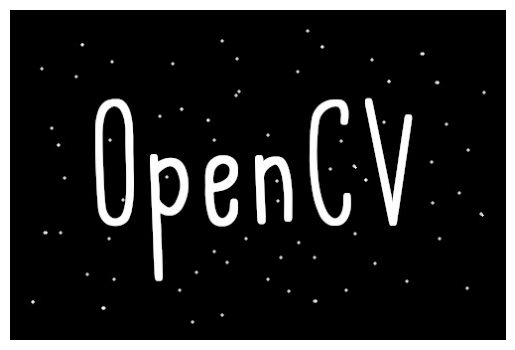

In [31]:
# Erosion 침식 : 작은 흰색 영역은 점점 줄어들고 얇은 선은 끊기며 노이즈는 사라진다
img = Image.open('./content/text-opencv.jpg')
gray = np.array(img)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

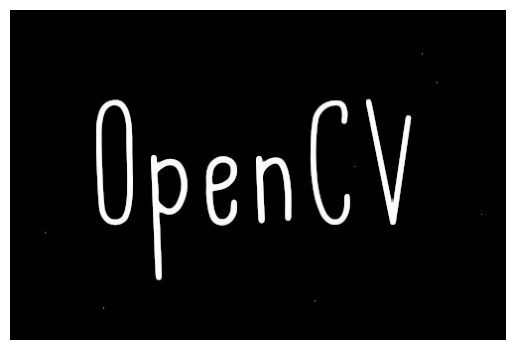

In [32]:
erosion = cv2.erode(gray, np.ones((3,3), np.uint8))

plt.imshow(erosion, cmap='gray')
plt.axis('off')
plt.show()

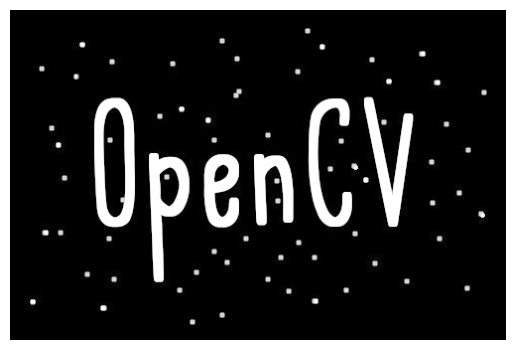

In [33]:
# Dilation : 팽창 (일정 크기 이상으로 하얀색이면 두꺼워짐)
dilation = cv2.dilate(gray, np.ones((3,3), np.uint8))         # 8픽셀

plt.imshow(dilation, cmap='gray')
plt.axis('off')
plt.show()

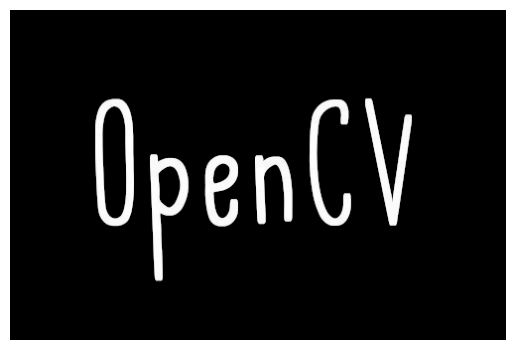

In [ ]:
# Opening (erosion -> dilate)

erosion = cv2.erode(gray, np.ones((5,5), np.uint8))                     # 하얀색 노이즈 먼저 없애고
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))                 # 하얀색 팽창시키고

plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.show()

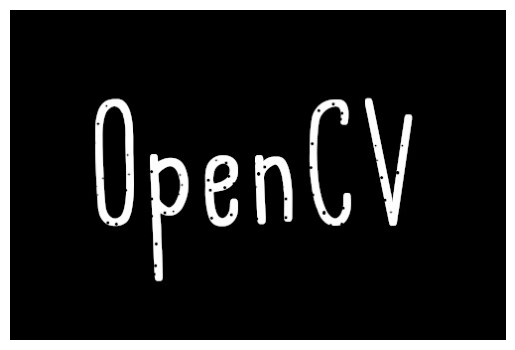

In [ ]:
# Closing (dilate -> erosion)
img = Image.open('./content/text-opencv2.jpg')
gray = np.array(img)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

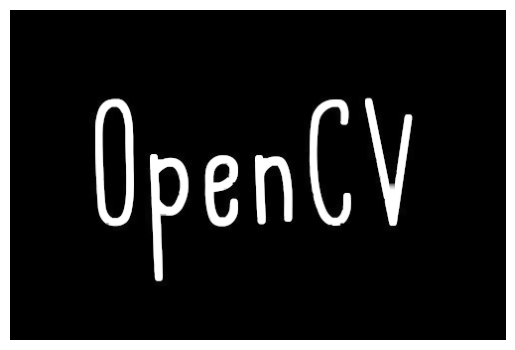

In [ ]:
# 구멍제거 (팽창시키고 노이즈 제거)
dilation = cv2.dilate(gray, np.ones((5,5), np.uint8))
closing = cv2.erode(dilation, np.ones((5,5), np.uint8))

plt.imshow(closing, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Blur (배경 노이즈 제거에 많이 쓰임)
# [Average Blur, Gaussian Blur, Median Blur, Bilateral filter]

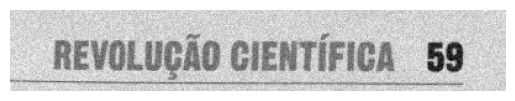

In [ ]:
img = Image.open('./content/test_noise.jpg')        # not clear
img_cv = np.array(img)

gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

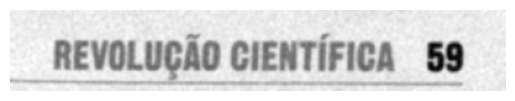

In [ ]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.show()

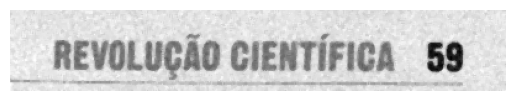

In [ ]:
# Median Blur
median_blur = cv2.medianBlur(gray, 3)

plt.imshow(median_blur, cmap='gray')
plt.axis('off')
plt.show()

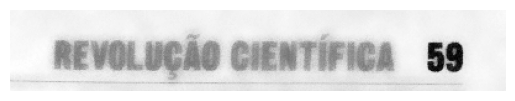

In [ ]:
# Bilateral filter
bilateral_filter = cv2.bilateralFilter(gray, 15, 55, 45)

plt.imshow(bilateral_filter, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract

In [ ]:
# !mkdir tessdata
# !wget -O ./tessdata/kor.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/kor.traineddata?raw=true
# !wget -O ./tessdata/kor_vert.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/kor_vert.traineddata?raw=true
# !wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(gaussian_blur, lang='por', config=config_tesseract)
print(text)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(median_blur, lang='por', config=config_tesseract)
print(text)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(bilateral_filter, lang='por', config=config_tesseract)
print(text)

In [ ]:
####

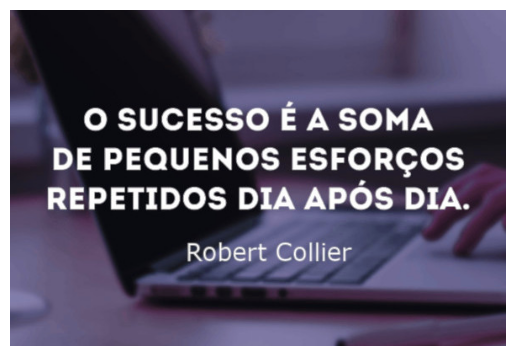

In [57]:
img = Image.open('./content/sentence.jpg')
img_cv = np.array(img)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()

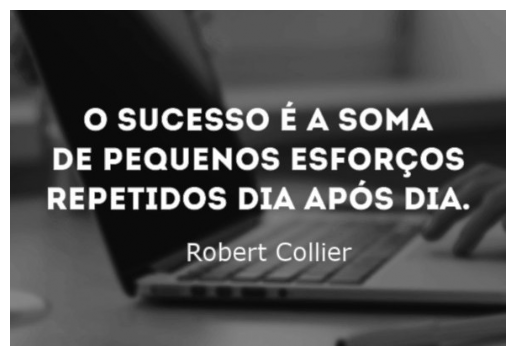

In [58]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

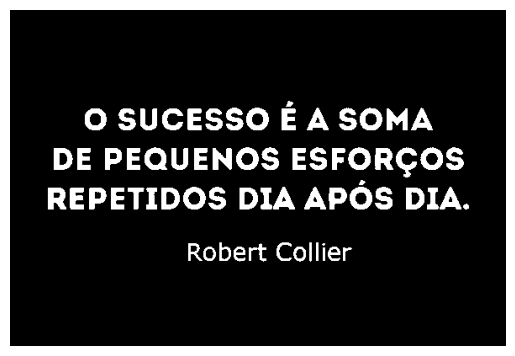

In [60]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.axis('off')
plt.show()

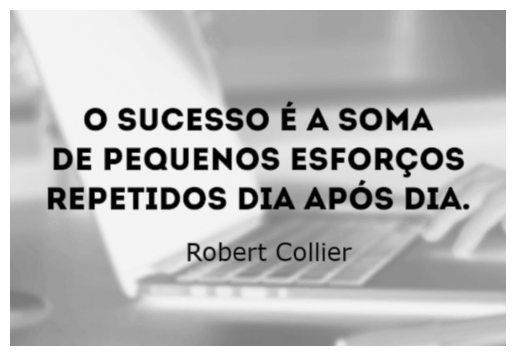

In [59]:
# 색상 반전
invert = 255 - gray

plt.imshow(invert, cmap='gray')
plt.axis('off')
plt.show()

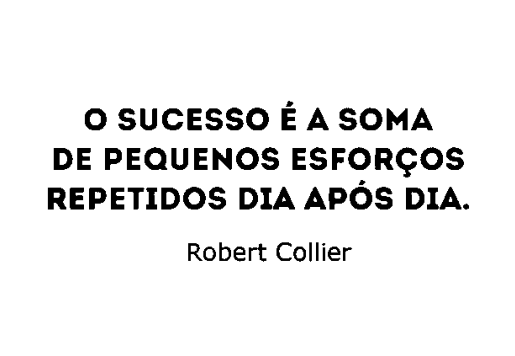

In [61]:
_, otsu2 = cv2.threshold(invert, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(otsu2, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
# config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(otsu2, lang='por', config=config_tesseract)
print(text)